In [2]:
import pandas as pd
sales = pd.read_csv('C:/Users/alexk/OneDrive/Desktop/Python Tings/Projects/LicenseModel.csv')

The file is imported and inspected for null values data types. 

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inLine
sns.set_palette('deep')
sales.head()

,Price,Tier,License,Revenue
0,1623,TierII,1.0,1623.0
1,1623,TierII,1.0,1623.0
2,1623,TierII,1.0,1623.0
3,1623,TierII,1.0,1623.0
4,1623,TierII,1.0,1623.0


In [3]:
sales.dtypes

Price        int64
Tier        object
License    float64
Revenue    float64
dtype: object

In [4]:
sales.isnull().any()

Price      False
Tier       False
License    False
Revenue    False
dtype: bool

## Data Exploration

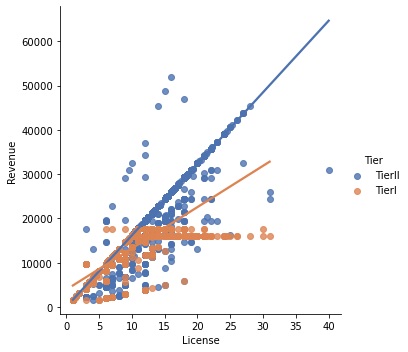

In [6]:
sns.lmplot(data=sales, x="License", y="Revenue", logx=False,hue='Tier')

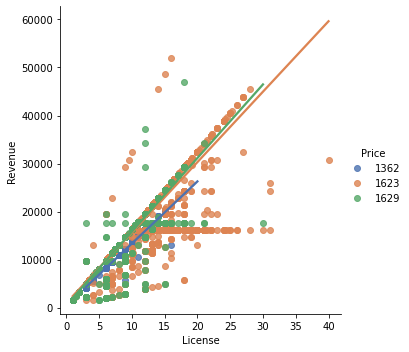

In [7]:
sns.lmplot(data=sales, x="License", y="Revenue", hue='Price')

### Notes

The two drivers for the revenue model is price and number of licenses. Reviewing the first scatter plot of revenue against licenses highlighting the two tiers, a linear trend can be identified with Tier II with some variation. Tier I does not follow a linear pattern as there is a special pricing structure. This relationship may be better captured with a polynomial regression with variables transformed to capture the growth decay. 

The data will be broken out by tier to model the datasets seperately.

In [3]:
salesT1, salesT2 = sales.query("Tier == 'TierI'").copy(), sales.query("Tier == 'TierII'").copy()

In [9]:
salesT1.sample(frac=0.01)

,Price,Tier,License,Revenue
14451,1362,TierI,4.0,5448.0
77378,1623,TierI,12.0,16065.0
79797,1623,TierI,12.0,16065.0
43567,1629,TierI,6.0,9774.0
14749,1362,TierI,4.0,5448.0
...,...,...,...,...
75513,1623,TierI,16.0,16065.0
78076,1623,TierI,16.0,16065.0
43156,1629,TierI,6.0,9774.0
76977,1623,TierI,10.0,16065.0


In [10]:
salesT2.sample(frac=0.01)

,Price,Tier,License,Revenue
96959,1623,TierII,12.00,19476.00
22113,1623,TierII,6.00,9738.00
8088,1623,TierII,3.00,4869.00
112149,1623,TierII,15.25,24750.75
89202,1623,TierII,12.00,19476.00
...,...,...,...,...
21682,1623,TierII,6.00,9738.00
22695,1623,TierII,6.00,9738.00
83380,1623,TierII,10.00,16230.00
101583,1623,TierII,13.00,21099.00


Below are simple regression lines on licenses and revenue separated by Tier. A Log transformation on TierI shows a slight improvement, but further transformations should be considered. 

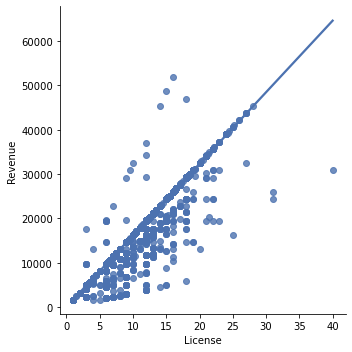

In [12]:
sns.lmplot(data=salesT2, x="License", y="Revenue")


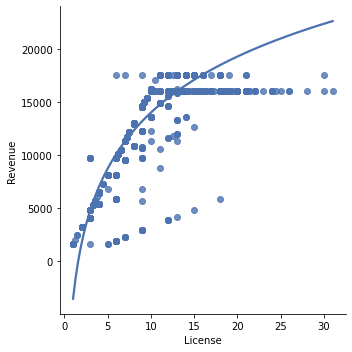

In [13]:
sns.lmplot(data=salesT1, x="License", y="Revenue", logx=True)

## Tier II Mutliple Linear Regression Model

In [4]:
#Define the indpendent and dependent variables
XT2 = salesT2.drop(['Revenue', 'Tier'], axis=1)
yT2 = salesT2['Revenue']

In [5]:
#Split the data 80% used to train the model and 20% used to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XT2, yT2, test_size=0.2, random_state=0)

In [6]:
from sklearn.linear_model import LinearRegression 
salesT2_regressor = LinearRegression()
salesT2_regressor.fit(X_train,y_train)

LinearRegression()

Ordinary Least Squares Regression Results to see R-squared and p-values of the independent variables and the coefficients. The weight of the coefficient determines the variable's impact. P-values less than 0.05 are significant and aid in prediction of the  target. The null hypothesis that all coefficients are equal to zero is rejected and the alternative hypothesis is accepted in this case. The large F-statistic also provides evidence in favor of the alternative hypothesis.

In [19]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train) #This will apply an intercept to the model
est = sm.OLS(y_train, X_train2) #OLS to fit linerar regression model on the training set
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.753e+06
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:04:29   Log-Likelihood:            -5.9302e+05
No. Observations:               75337   AIC:                         1.186e+06
Df Residuals:                   75334   BIC:                         1.186e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.137e+04    171.792    -66.174      0.0

Now we will evaluate the perfomance of the linear regression on the training and test set.

In [7]:
y_train_pred = salesT2_regressor.predict(X_train) #Make prediction on training set 
y_test_pred = salesT2_regressor.predict(X_test) #Make prediction on test set 


We compare the actual value and the predicted value of target variable.
Differences are the residuals to evaluate performance.

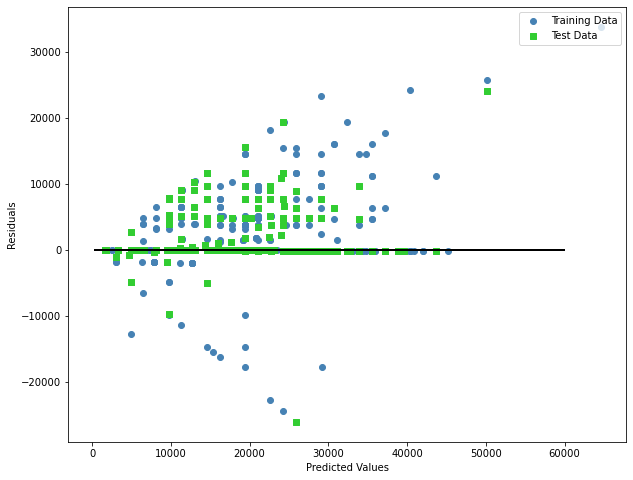

In [10]:
plt.figure(figsize = (10,8))
plt.scatter(y_train_pred, y_train_pred-y_train,c='steelblue',marker ='o', label='Training Data') 
plt.scatter(y_test_pred, y_test_pred-y_test,c='limegreen',marker ='s', label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=200, xmax=60000, color='black',lw=2) #create a line to pass through x axis equal to zero
plt.show()

#### Results

The Plot of Residuals should show randomly scattered residuals. The apparent fan shape indicates there variability not being captured by the two feature variables Price and License count. The observations that do not follow the standard pricing schedule should be reviewed for promotion pricing or discounts. Notably however, a vast majority of predicted values were captured from the regression line.



Performance indicators to review are Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). MAE does not punish for large errors when there are few in comparison to the total population. MSE and RMSE do punish for large errors. MAE and RMSE can be compared to the average value target variable y. 

We also want to see the errors close in measurement on both training and test data. If the errors are significantly higher on the test data, it indicates the model overfit on training and will not perform well when new data is introduced.

In [23]:
from sklearn import metrics
import numpy as np
print('MAE on Test Data',metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE on Training Data',metrics.mean_absolute_error(y_train, y_train_pred))
 

print('MSE on Test Data',metrics.mean_squared_error(y_test, y_test_pred))
print('MSE on Training Data',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE on Test Data',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('RMSE on Training Data',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

#We see the errors are close on training and on test set.

MAE on Test Data 90.3720689203852
MAE on Training Data 87.2999737615722
MSE on Test Data 397606.936566013
MSE on Training Data 402452.52904845594
RMSE on Test Data 630.5608111562382
RMSE on Training Data 634.3914635683994


Next is to compare R squared value between training and test sets. R squared describes how much variability is explained by the predictor variables.

In [24]:
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred)
r_sq_train = r2_score(y_train, y_train_pred)
print("R Squared on Test Set:", r_sq_test)
print("R Squared on Training Set:", r_sq_train)


R Squared on Test Set: 0.9901770924675778
R Squared on Training Set: 0.9900623423388302


#### Results

We see R Squared is large on both the training and test set of the data with an average prediction error of 90.4. We can calculate the average error percentage at 0.631%.

In [27]:
salesT2["Revenue"].mean()

13842.288538312867

In [28]:
#Error percentage
metrics.mean_absolute_error(y_train, y_train_pred)/salesT2["Revenue"].mean()

0.006306758706838266

## Tier I Model Linear Regression 

In [11]:
#Define the independent and dependent variables
XT1 = salesT1.drop(['Revenue', 'Tier'], axis=1)
yT1 = salesT1['Revenue']

In [35]:
#Split training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XT1, yT1, test_size=0.2, random_state=0)

In [36]:
from sklearn.linear_model import LinearRegression 
salesT1_regressor = LinearRegression()
salesT1_regressor.fit(X_train,y_train)

LinearRegression()

In [37]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2) 
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 4.319e+04
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:01:14   Log-Likelihood:            -1.5505e+05
No. Observations:               17492   AIC:                         3.101e+05
Df Residuals:                   17489   BIC:                         3.101e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5382.3947    276.503    -19.466      0.0

In [56]:

y_train_pred = salesT1_regressor.predict(X_train)
y_test_pred = salesT1_regressor.predict(X_test) 


In [43]:
from sklearn import metrics
import numpy as np
print('MAE on Test Data',metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE on Training Data',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE on Test Data',metrics.mean_squared_error(y_test, y_test_pred))
print('MSE on Training Data',metrics.mean_squared_error(y_train, y_train_pred))

print('RMSE on Test Data',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('RMSE on Training Data',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))


MAE on Test Data 1257.9512828481063
MAE on Training Data 1235.8999382992743
MSE on Test Data 3118380.7629961795
MSE on Training Data 2927848.094575333
RMSE on Test Data 1765.8937575619263
RMSE on Training Data 1711.0955831207482


In [44]:
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred)
r_sq_train = r2_score(y_train, y_train_pred)
print("R Squared on Test Set:", r_sq_test)
print("R Squared on Training Set:", r_sq_train)



R Squared on Test Set: 0.8202869388333505
R Squared on Training Set: 0.8316113709626016


In [57]:
#Error percentage 10.3%
metrics.mean_absolute_error(y_train, y_train_pred)/salesT1["Revenue"].mean()

0.10313097967490033

### Results

Running a linear regression on Tier I licenses is not a good fit as expected. R Squared of only 83% with an average error percentage of 10.3%.

## Tier I Multiple Regression Model with Transformation 

Transformations can be made to the variables in attempt to improve the model. Common transformations are interaction terms and log of variables. Due to the apparent ceiling reached on revenue, another variable to try to capture this condition will be introduced.

In [47]:
salesT1Trans = salesT1

In [49]:
salesT1Trans.head()

,Price,Tier,License,Revenue
221,1623,TierI,1.0,1623.0
222,1623,TierI,1.0,1623.0
223,1623,TierI,1.0,1623.0
224,1623,TierI,1.0,1623.0
225,1623,TierI,1.0,1623.0


In [51]:
salesT1Trans=salesT1.drop(['Tier'], axis=1)

In [52]:
salesT1Trans.head()

,Price,License,Revenue
221,1623,1.0,1623.0
222,1623,1.0,1623.0
223,1623,1.0,1623.0
224,1623,1.0,1623.0
225,1623,1.0,1623.0


In [55]:
salesT1Trans['Interaction']=salesT1Trans['Price']*salesT1Trans['License']
salesT1Trans.sample(frac=.01)

,Price,License,Revenue,Interaction
30675,1623,6.0,9738.0,9738.0
27203,1623,6.0,9738.0,9738.0
76414,1623,11.0,16065.0,17853.0
7363,1623,3.0,4869.0,4869.0
76692,1623,10.0,16065.0,16230.0
...,...,...,...,...
44467,1629,6.0,9774.0,9774.0
43533,1629,6.0,9774.0,9774.0
16843,1623,4.0,6492.0,6492.0
45297,1629,6.0,9774.0,9774.0


In [58]:
salesT1Trans['LogRevenue']=np.log(salesT1Trans['Revenue'])
salesT1Trans.sample(frac=.01)

,Price,License,Revenue,Interaction,LogRevenue
55407,1623,7.0,11361.0,11361.0,9.337942
69787,1629,9.0,14661.0,14661.0,9.592946
43540,1629,6.0,9774.0,9774.0,9.187481
76318,1623,18.0,16065.0,29214.0,9.684398
14487,1362,4.0,5448.0,5448.0,8.603004
...,...,...,...,...,...
76682,1623,18.0,16065.0,29214.0,9.684398
74519,1623,15.0,16065.0,24345.0,9.684398
65118,1623,9.0,14607.0,14607.0,9.589256
65286,1623,9.0,14607.0,14607.0,9.589256


In [59]:
salesT1Trans['LogInteraction']=np.log(salesT1Trans['Interaction'])
salesT1Trans.sample(frac=.01)

,Price,License,Revenue,Interaction,LogRevenue,LogInteraction
80564,1623,12.5,16065.0,20287.5,9.684398,9.917760
44076,1629,6.0,9774.0,9774.0,9.187481,9.187481
28578,1623,6.0,9738.0,9738.0,9.183791,9.183791
74415,1623,18.0,16065.0,29214.0,9.684398,10.282403
51344,1362,8.0,10896.0,10896.0,9.296151,9.296151
...,...,...,...,...,...,...
77437,1623,12.0,16065.0,19476.0,9.684398,9.876938
80701,1623,12.0,16065.0,19476.0,9.684398,9.876938
44270,1629,6.0,9774.0,9774.0,9.187481,9.187481
78570,1623,11.0,16065.0,17853.0,9.684398,9.789927


In [62]:
#Set the conditions - licenses at 10 or more will be labeled FlatPrice, less than 10 labeled noFlatPrice
#less than 10 indicates the ceiling  has not been reached 
conditions = [
    (salesT1Trans['License'] >= 10),
    (salesT1Trans['License'] < 10)]

In [64]:
#Assign values
values = ['FlatPrice', 'noFlatPrice']

In [66]:
#Add a new column based on conditions
salesT1Trans['FlatPrice'] = np.select(conditions, values)

In [67]:
salesT1Trans.sample(frac=0.01)

,Price,License,Revenue,Interaction,LogRevenue,LogInteraction,FlatPrice
59574,1623,8.00,12984.0,12984.00,9.471473,9.471473,noFlatPrice
55129,1623,7.00,11361.0,11361.00,9.337942,9.337942,noFlatPrice
80438,1623,15.25,16065.0,24750.75,9.684398,10.116611,FlatPrice
80053,1623,15.00,16065.0,24345.00,9.684398,10.100082,FlatPrice
76528,1623,12.00,16065.0,19476.00,9.684398,9.876938,FlatPrice
...,...,...,...,...,...,...,...
42593,1629,6.00,9774.0,9774.00,9.187481,9.187481,noFlatPrice
15105,1362,4.00,5448.0,5448.00,8.603004,8.603004,noFlatPrice
8533,1623,3.00,4869.0,4869.00,8.490644,8.490644,noFlatPrice
80732,1623,15.00,16065.0,24345.00,9.684398,10.100082,FlatPrice


Now that the variable has been set based on pricing cap, the categorical variable will be converted to a dummy variable for use in the regression. 

In [69]:
SalesT1Dum = pd.get_dummies(salesT1Trans, drop_first=True)

In [70]:
SalesT1Dum.sample(frac=0.01)

,Price,License,Revenue,Interaction,LogRevenue,LogInteraction,FlatPrice_noFlatPrice
45085,1629,6.0,9774.0,9774.0,9.187481,9.187481,1
78981,1623,10.0,16065.0,16230.0,9.684398,9.694617,0
69968,1629,9.0,14661.0,14661.0,9.592946,9.592946,1
55428,1623,7.0,11361.0,11361.0,9.337942,9.337942,1
85026,1629,14.0,17580.0,22806.0,9.774517,10.034779,0
...,...,...,...,...,...,...,...
81013,1623,16.0,16065.0,25968.0,9.684398,10.164620,0
31544,1623,6.0,9738.0,9738.0,9.183791,9.183791,1
75861,1623,15.0,16065.0,24345.0,9.684398,10.100082,0
30316,1623,6.0,9738.0,9738.0,9.183791,9.183791,1


In [71]:
#Define independent and dependent variables
XT1Trans = SalesT1Dum.drop(['Revenue','LogRevenue'],axis=1)
yT1Trans = SalesT1Dum['LogRevenue']

In [73]:
#Split trainig and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XT1Trans, yT1Trans, test_size=0.2, random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression 
salesT1Trans_regressor = LinearRegression()
salesT1Trans_regressor.fit(X_train,y_train)

LinearRegression()

In [75]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train2) 
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             LogRevenue   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.085e+05
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:43:55   Log-Likelihood:                 19972.
No. Observations:               17492   AIC:                        -3.993e+04
Df Residuals:                   17486   BIC:                        -3.988e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.33

In [77]:
y_train_pred = salesT1Trans_regressor.predict(X_train) 
y_test_pred = salesT1Trans_regressor.predict(X_test)

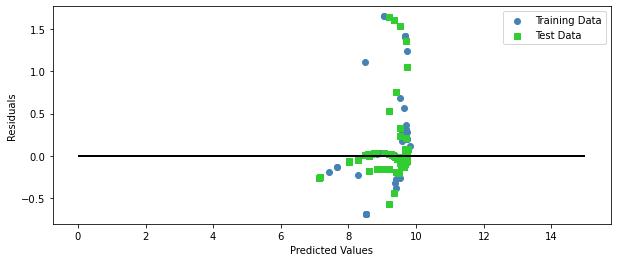

In [83]:
plt.figure(figsize = (10,4))
plt.scatter(y_train_pred, y_train_pred-y_train,c='steelblue',marker ='o', label='Training Data') 
plt.scatter(y_test_pred, y_test_pred-y_test,c='limegreen',marker ='s', label='Test Data')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=0, xmax=15, color='black',lw=2) 
plt.show()

We can see some training and test predicted values fall close to the actual, but there is a clearly defined pattern indicating the model is not capturing the trend. 

In [80]:
from sklearn import metrics
import numpy as np
print('MAE on Test Data',metrics.mean_absolute_error(y_test, y_test_pred))
print('MAE on Training Data',metrics.mean_absolute_error(y_train, y_train_pred))

print('MSE on Test Data',metrics.mean_squared_error(y_test, y_test_pred))
print('MSE on Training Data',metrics.mean_squared_error(y_train, y_train_pred))


print('RMSE on Test Data',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('RMSE on Training Data',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

MAE on Test Data 0.035385834724065986
MAE on Training Data 0.03449414175840214
MSE on Test Data 0.007251884792887348
MSE on Training Data 0.005967732441310236
RMSE on Test Data 0.0851579989953225
RMSE on Training Data 0.07725109993592477


In [81]:
metrics.mean_absolute_error(y_train, y_train_pred)/salesT1Trans["LogRevenue"].mean()

0.003704824010572824

Metrics indicate there is a clear improvement in the model with an increased R squared and lower average error percentage.

# Conclusion

Revenue could be projected for Tier II customers with multiple linear regression fairly accurately and should be considered. Other models should be considered when projecting revenue for Tier I because the feature variables do not have a linear relationship with the target variable. In addition, the complexity introduced with the transformed variables makes it more difficult to interpret to coefficients.